# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data


In [2]:
boston_dataset = load_boston()

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [8]:
# create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names )

# add column with the price (target)
data['PRICE'] = boston_dataset.target

In [9]:
data.head() # the top rows look like this

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [10]:
data.tail() # the rows at bottom look like this

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [11]:
data.count() # show us the no. of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [12]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar charts

<function matplotlib.pyplot.show(close=None, block=None)>

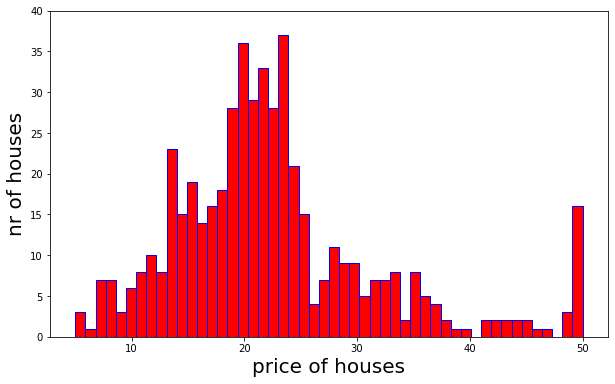

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='blue', color='red')
plt.xlabel('price of houses', fontsize=20)
plt.ylabel('nr of houses', fontsize=20)
plt.ylim([0, 40])
plt.show

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


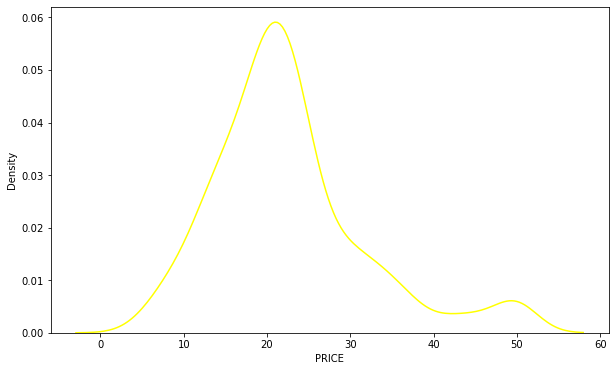

In [15]:
plt.figure(figsize=[10, 6])
sns.distplot(data['PRICE'], bins=50, hist= False, kde=True, color= 'yellow')
plt.show()

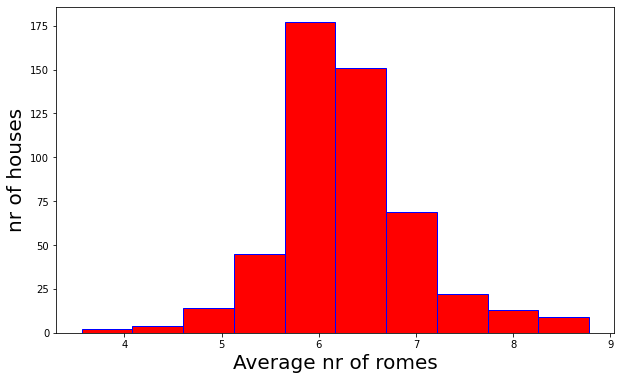

In [16]:
plt.figure(figsize=(10, 6))
plt.xlabel('Average nr of romes', fontsize=20)
plt.ylabel('nr of houses', fontsize=20)
plt.hist(data['RM'], ec='blue', color='red')
plt.show()

In [17]:
data['RM'].mean()

6.284634387351787

<function matplotlib.pyplot.show(close=None, block=None)>

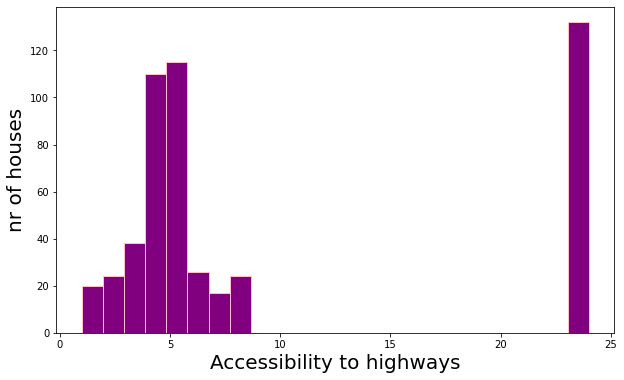

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, ec='pink',rwidth=500, color='purple')
plt.xlabel('Accessibility to highways', fontsize=20)
plt.ylabel('nr of houses', fontsize=20)

plt.show

In [19]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

<BarContainer object of 9 artists>

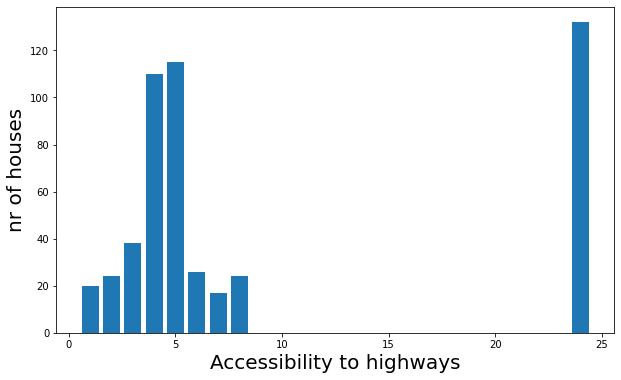

In [20]:
frequency = data['RAD'].value_counts()
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize=(10, 6))

plt.xlabel('Accessibility to highways', fontsize=20)
plt.ylabel('nr of houses', fontsize=20)
plt.bar(x=frequency.index, height=frequency)

In [21]:
data['CHAS'].value_counts()


0.0    471
1.0     35
Name: CHAS, dtype: int64

In [22]:
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
PRICE      1.108098
dtype: float64

## Correlation

## $$ \rho _{XY} = corr{(x, y)} $$
## $$ -1 \leq \rho _{XY} \leq +1 $$

In [23]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [24]:
data.shape

(506, 14)

In [25]:
data.corr() # pearson correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [26]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask.shape

(14, 14)

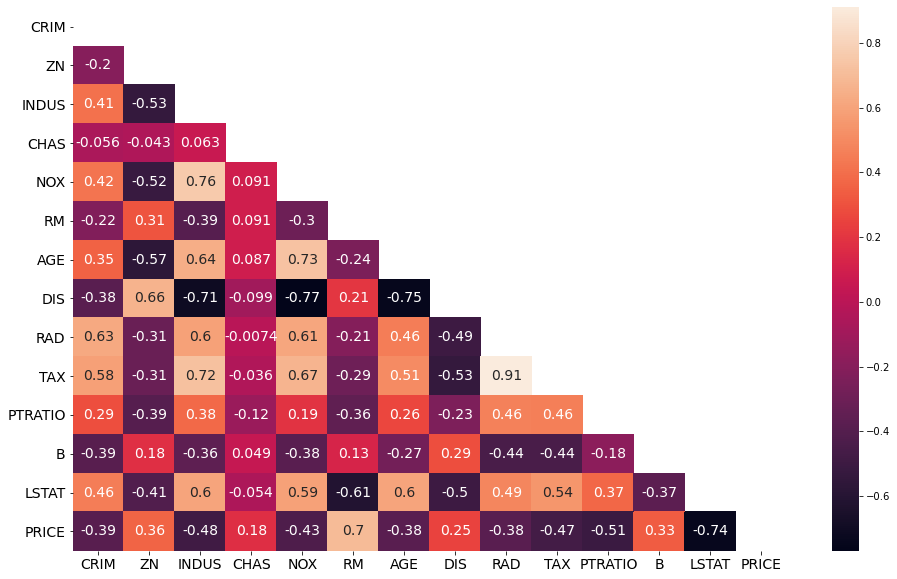

In [27]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.show()

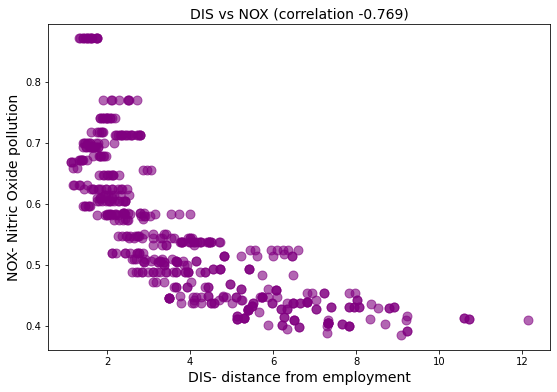

In [28]:
dis_nox_corr = round(data['DIS'].corr(data['NOX']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(data['DIS'], data['NOX'], color= 'purple', alpha= 0.6, s=80)
plt.xlabel('DIS- distance from employment', fontsize=14)
plt.ylabel('NOX- Nitric Oxide pollution', fontsize=14)
plt.title(f'DIS vs NOX (correlation {dis_nox_corr})', fontsize= 14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

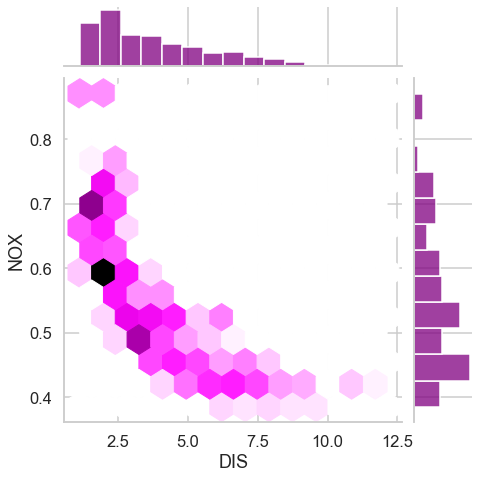

In [29]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x= data['DIS'], y= data['NOX'],kind= 'hex', height= 7, color='purple' )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

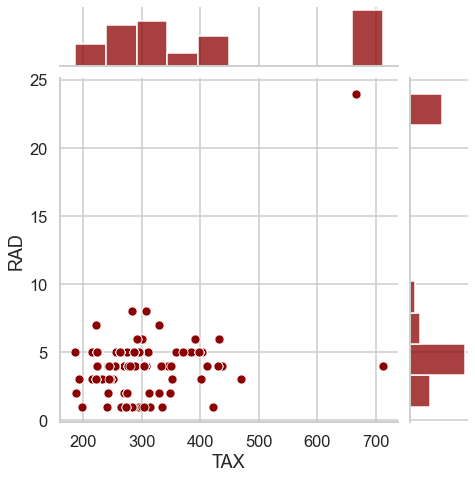

In [30]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x= data['TAX'], y= data['RAD'], height= 7, color='darkred' )
plt.show

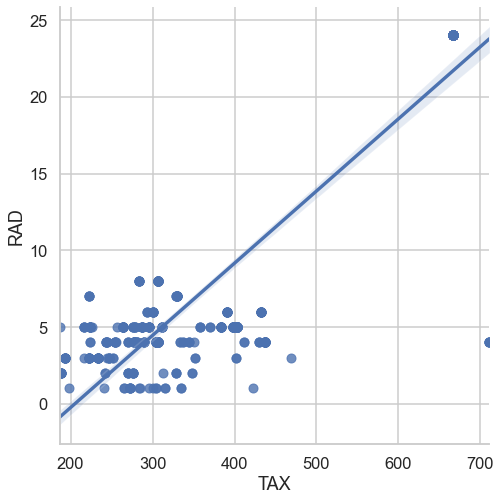

In [31]:
sns.lmplot(x= 'TAX', y= 'RAD', data=data, height=7)
plt.show()

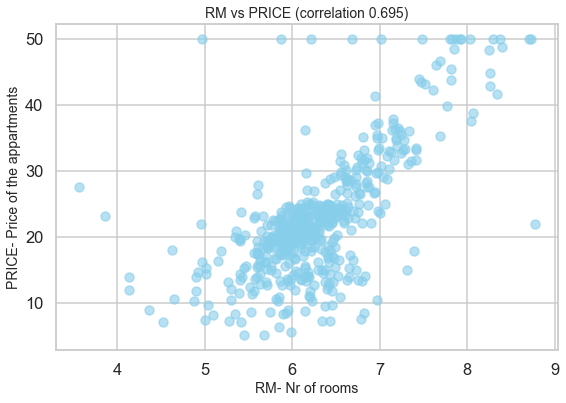

In [32]:
rm_price_corr = round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(data['RM'], data['PRICE'], color= 'skyblue', alpha= 0.6, s=80)
plt.xlabel('RM- Nr of rooms', fontsize=14)
plt.ylabel('PRICE- Price of the appartments', fontsize=14)
plt.title(f'RM vs PRICE (correlation {rm_price_corr})', fontsize= 14)
plt.show()

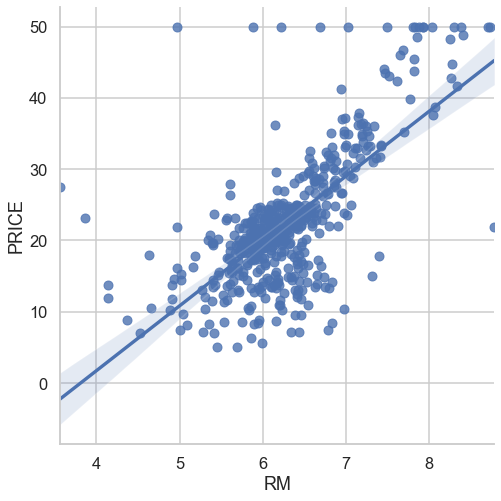

In [33]:
sns.lmplot(x= 'RM', y= 'PRICE', data=data, height=7)
plt.show()

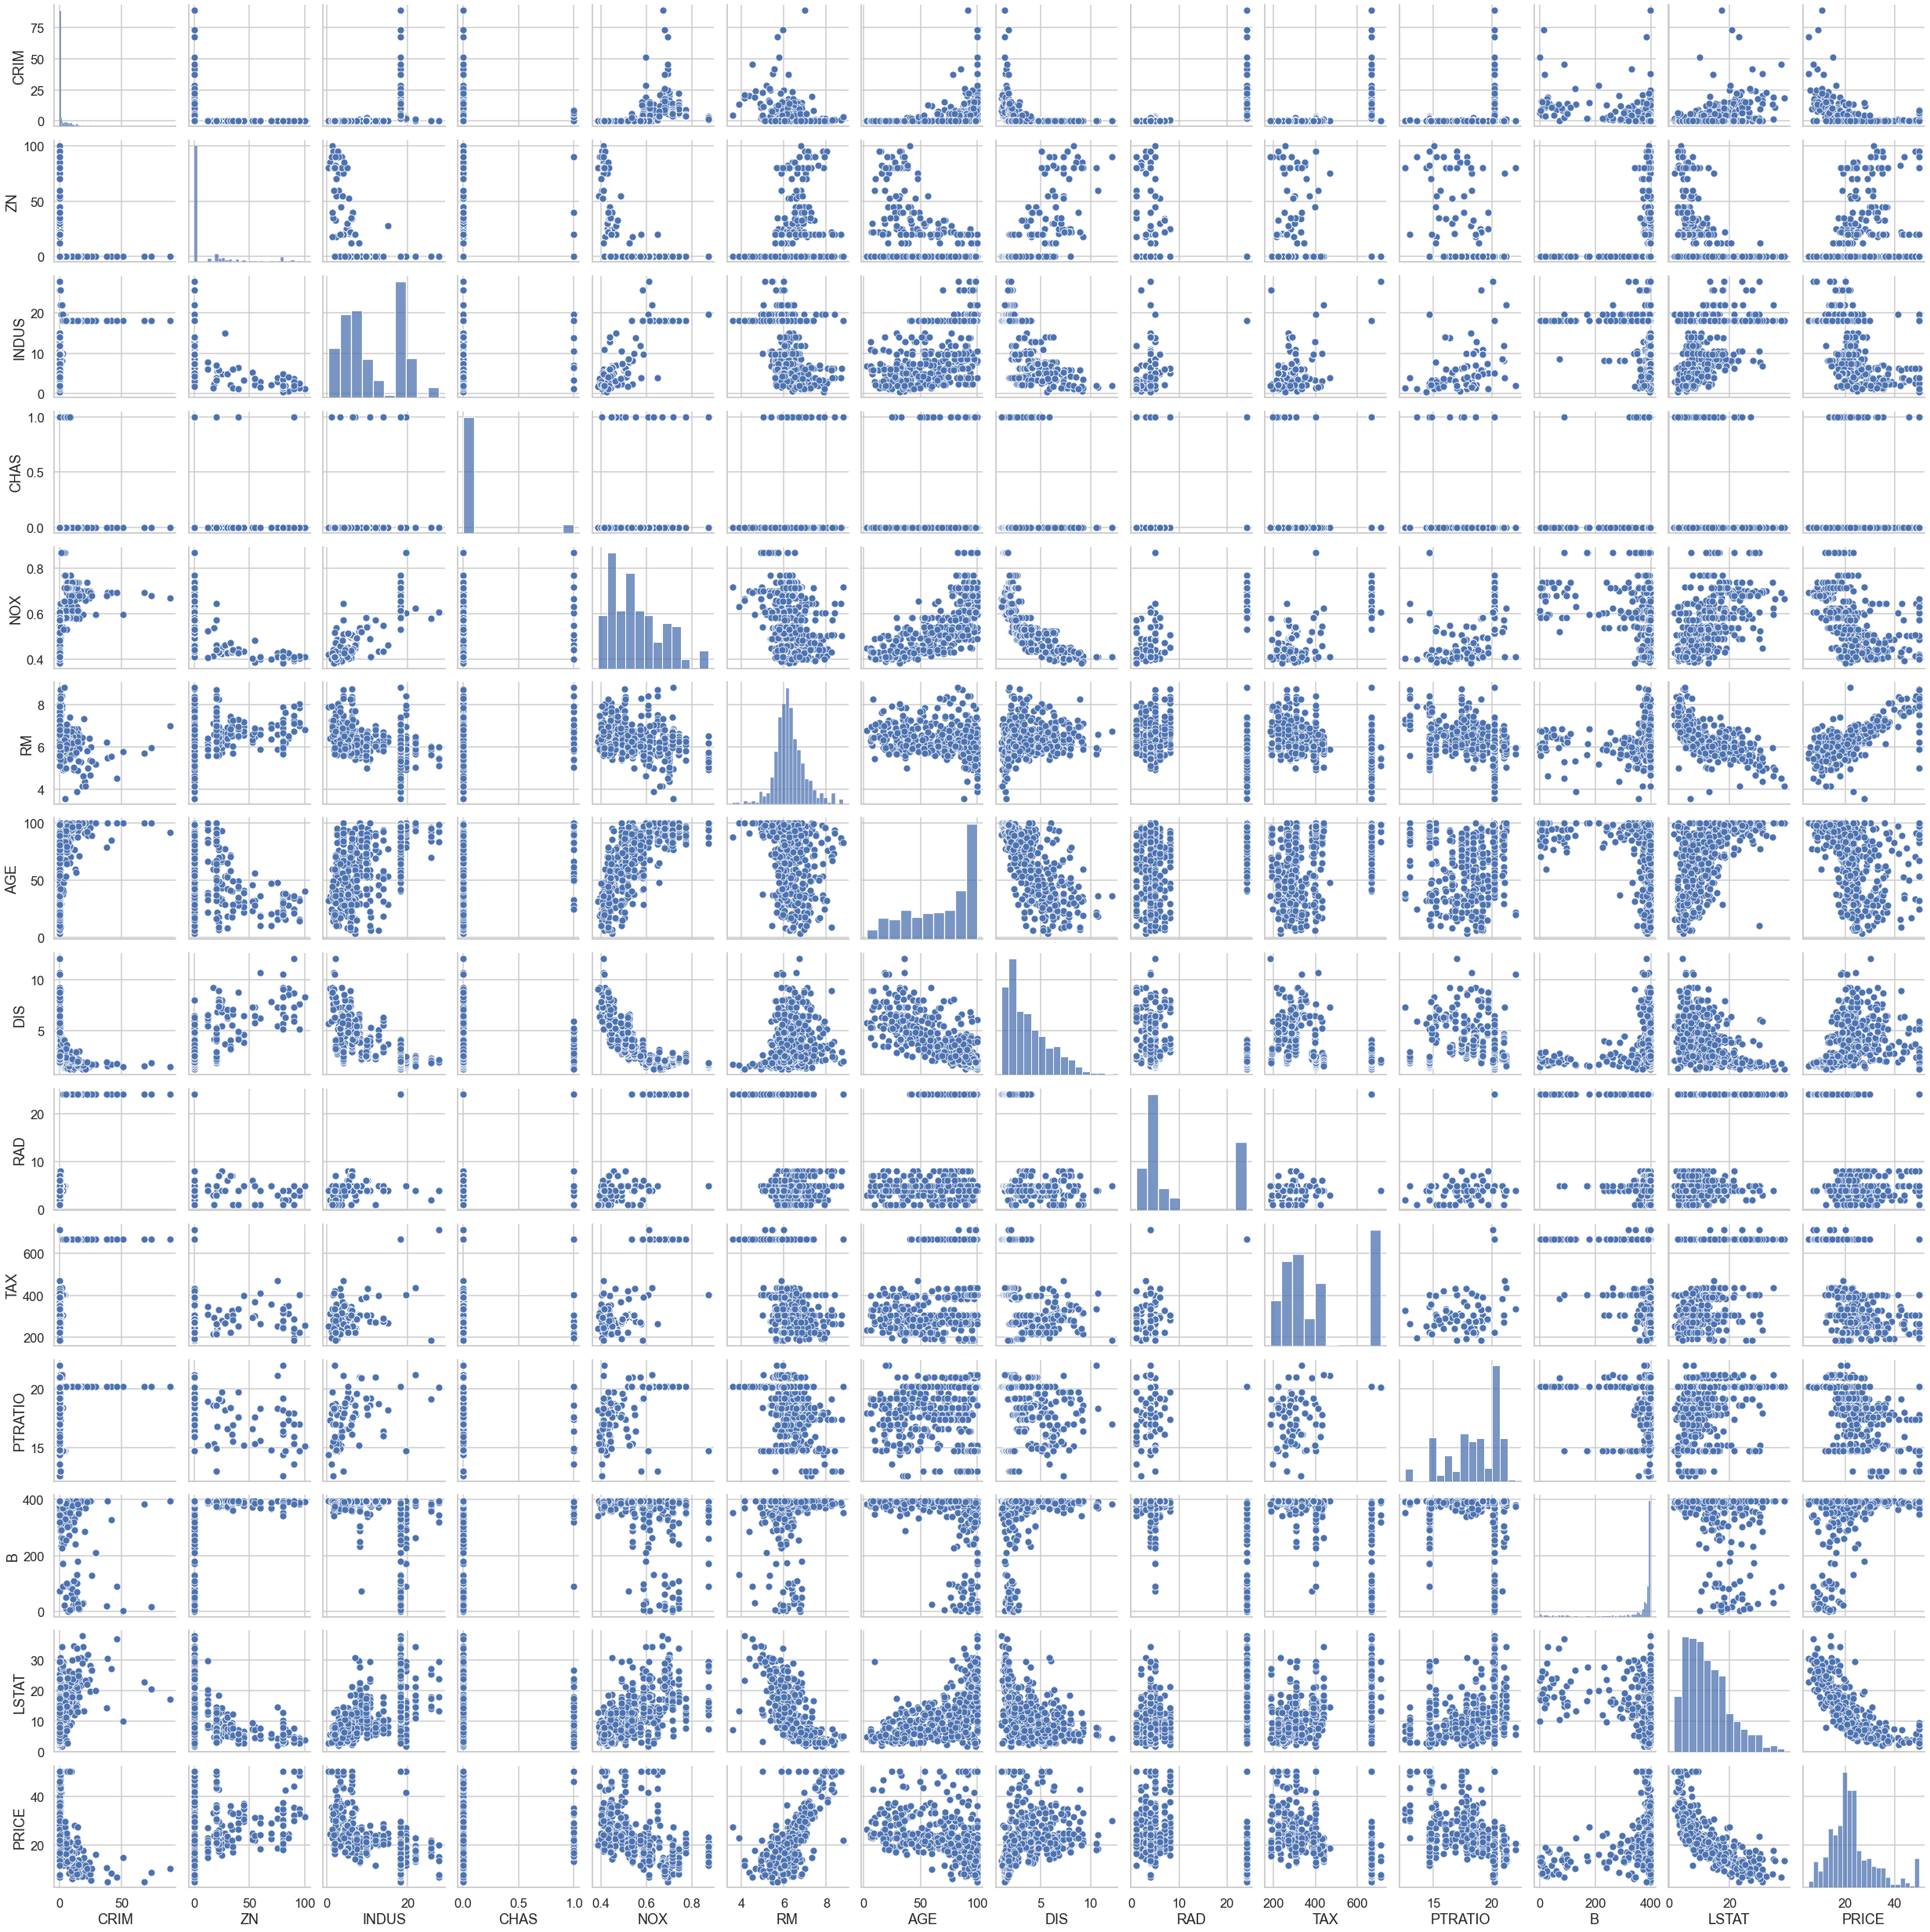

Wall time: 57.2 s


In [34]:
%%time

sns.pairplot(data)
plt.show()

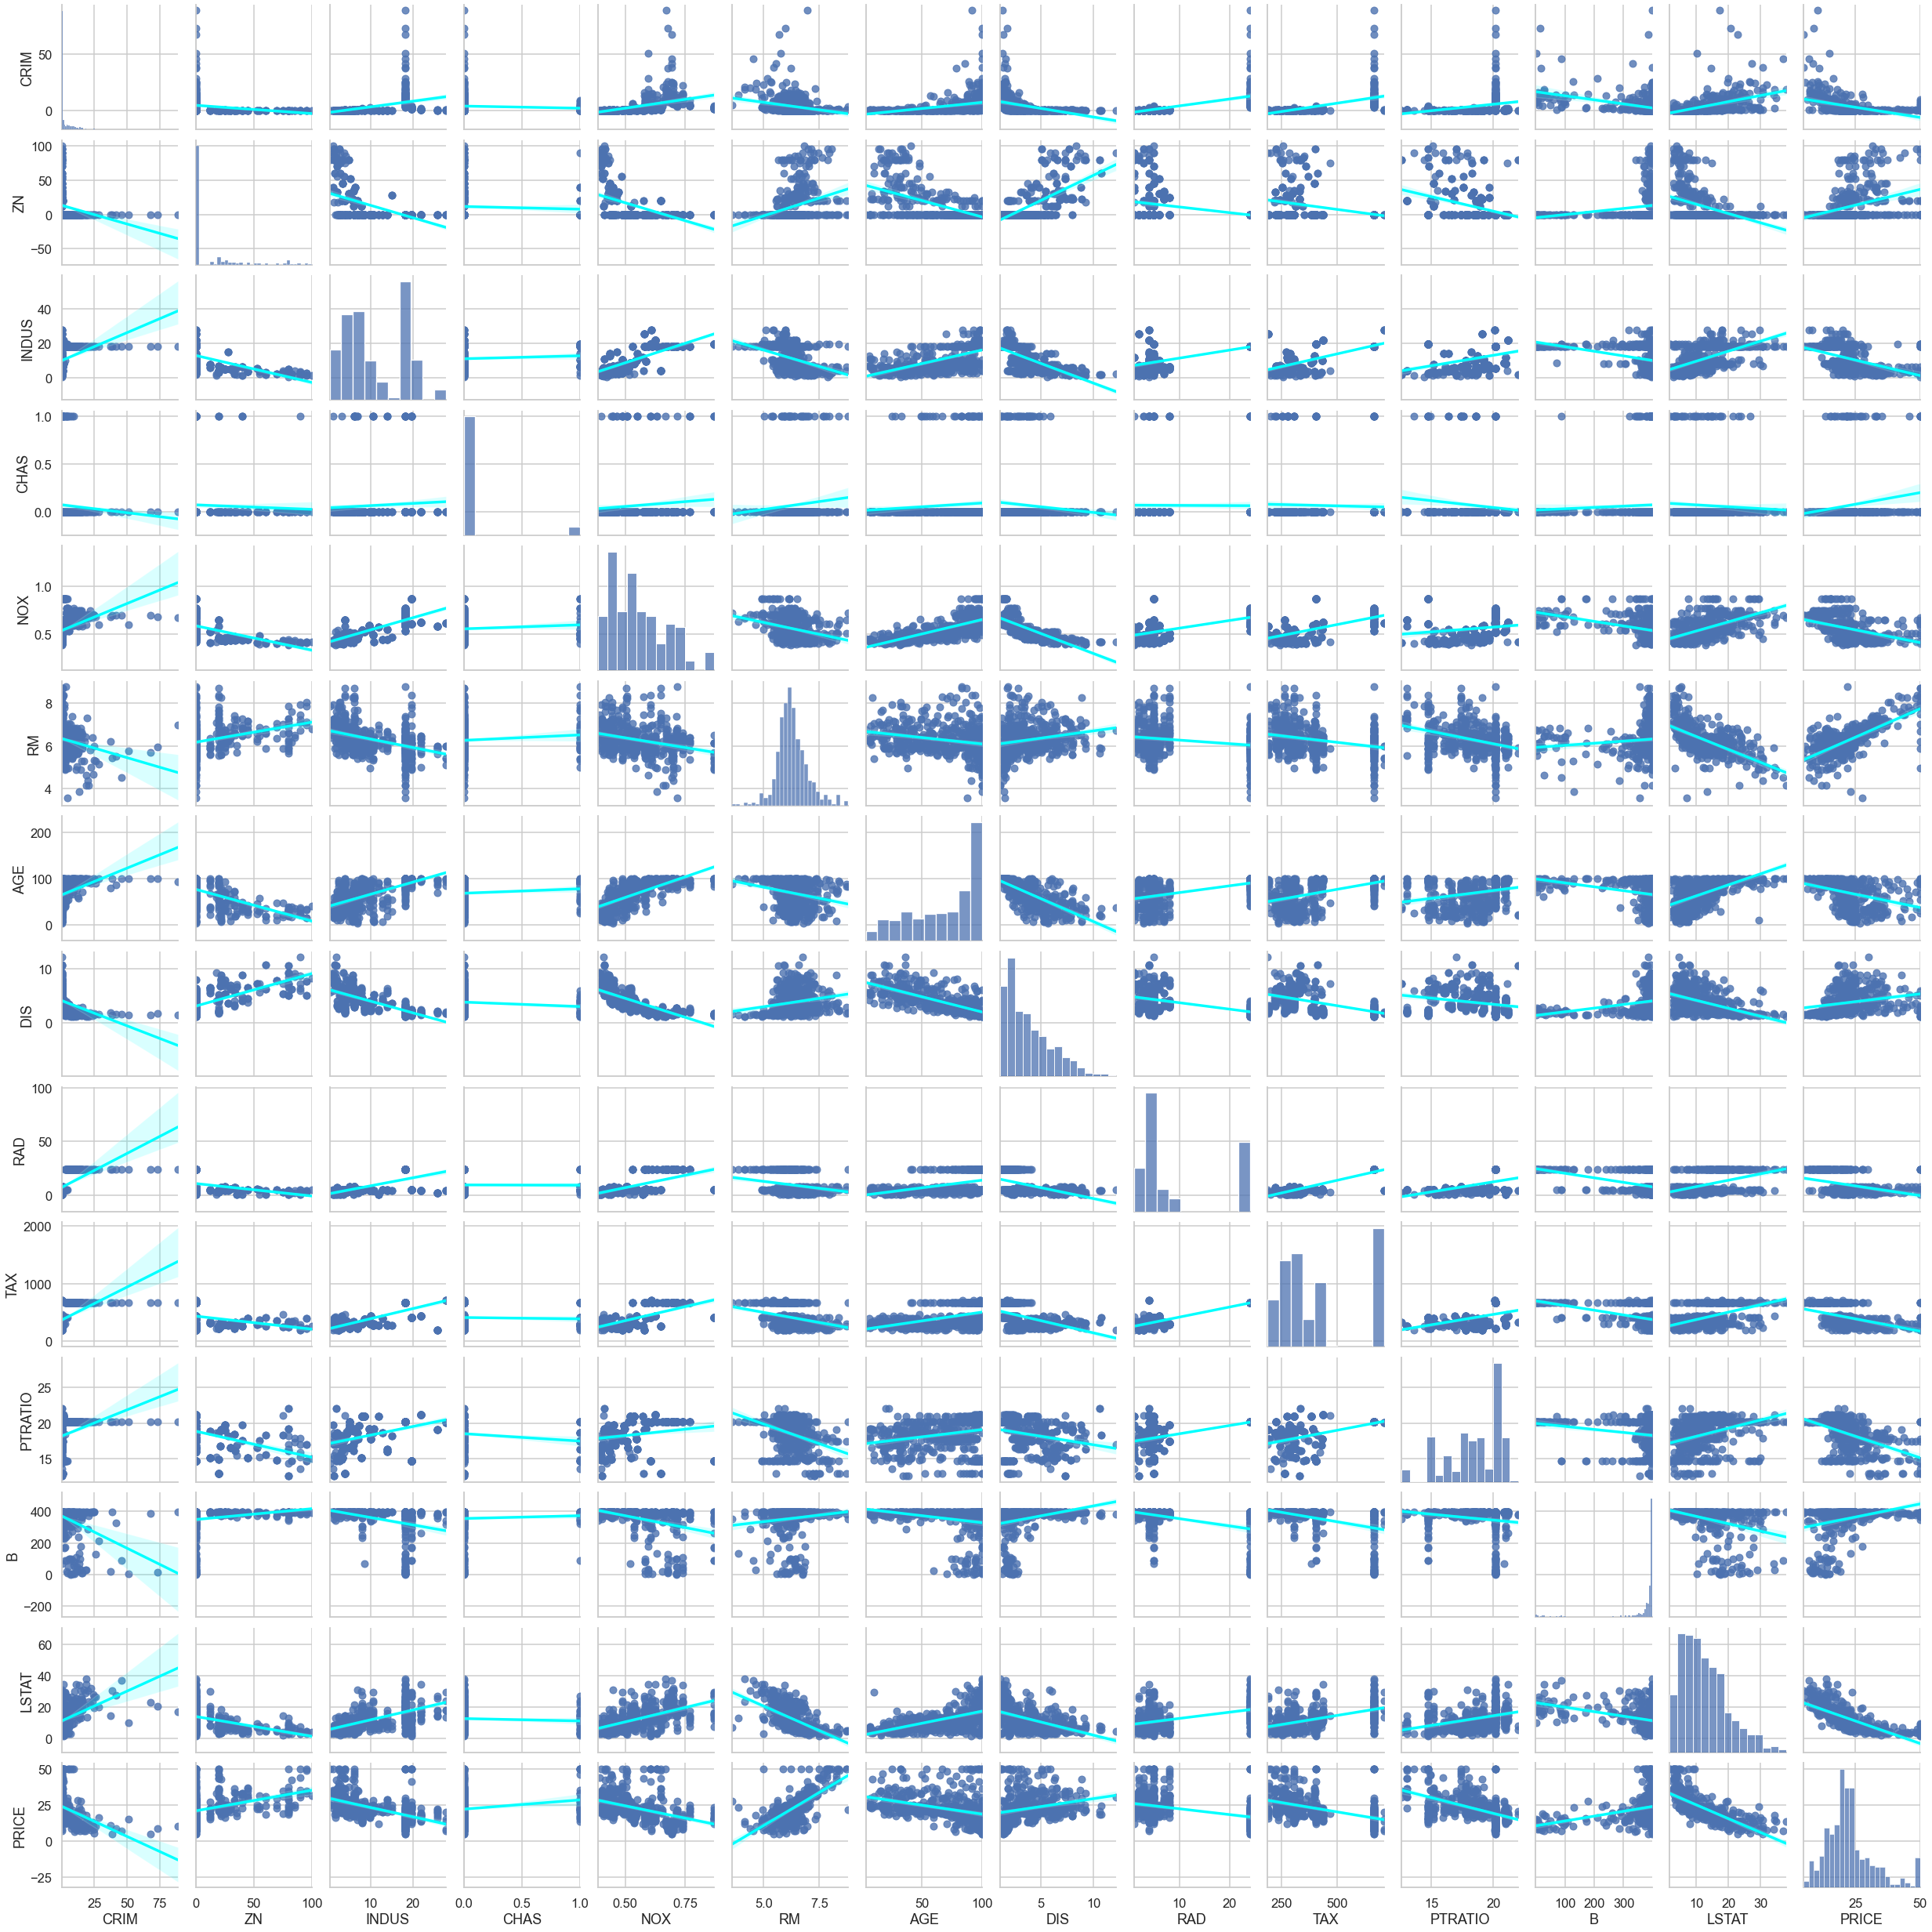

Wall time: 1min 24s


In [35]:
%%time

sns.pairplot(data, kind= 'reg', plot_kws= {'line_kws':{'color': 'cyan'}})
plt.show()

## Training and test dataset split

In [36]:
prices= data['PRICE']
features= data.drop('PRICE', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size= 0.2, random_state= 10)

# % of training set
print(len(X_train)/len(features))

# % of testing set
X_test.shape[0]/features.shape[0]

0.7984189723320159


0.2015810276679842

In [37]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('intercept', regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))

pd.DataFrame(data= regr.coef_) #index=X_train.columns, columns= 'coef')

intercept 36.53305138282472
Training data r-squared: 0.750121534530608
Testing data r-squared: 0.6709339839115642


0
0   -0.128181
1    0.063198
2   -0.007576
3    1.974515
4  -16.271989
5    3.108456
6    0.016292
7   -1.483014
8    0.303988
9   -0.012082
10  -0.820306
11   0.011419
12  -0.581626

## Data Transformations

In [38]:
data['PRICE'].skew()

1.1080984082549072

In [39]:
y_log = np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


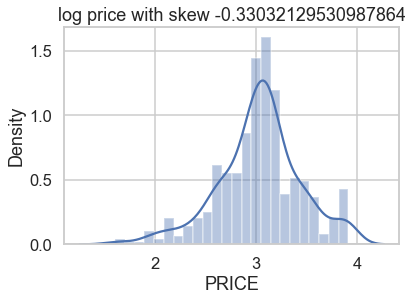

In [40]:
y_log.skew()
sns.distplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

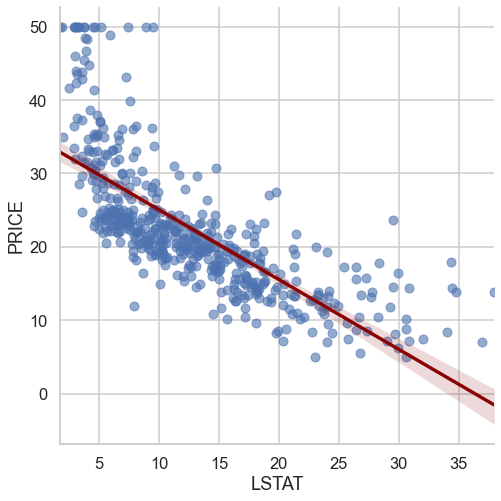

In [41]:
sns.lmplot(x= 'LSTAT', y= 'PRICE', data= data, height= 7,
           scatter_kws={'alpha': 0.6}, line_kws= {'color': 'darkred'} )
plt.show()

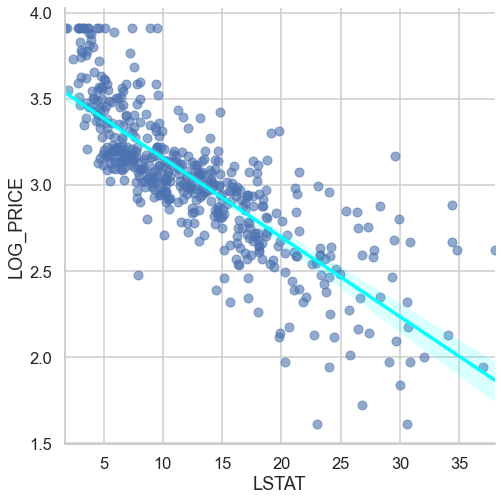

In [42]:
transformed_data = features 
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x= 'LSTAT', y= 'LOG_PRICE', data= transformed_data, height= 7,
           scatter_kws={'alpha': 0.6}, line_kws= {'color': 'cyan'} )
plt.show()

## Regression using log prices

In [43]:
prices= np.log(data['PRICE'])
features= data.drop('PRICE', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size= 0.2, random_state= 10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('intercept', regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))

pd.DataFrame(data= regr.coef_)# index=X_train.columns, columns= 'coef')

intercept 4.059943871775207
Training data r-squared: 0.7930234826697583
Testing data r-squared: 0.7446922306260737


0
0  -0.010672
1   0.001579
2   0.002030
3   0.080331
4  -0.704068
5   0.073404
6   0.000763
7  -0.047633
8   0.014565
9  -0.000645
10 -0.034795
11  0.000516
12 -0.031390

In [44]:
# chas river premium
np.e**0.080331

1.0836456950439142

## p values and evaluating coefficients

In [45]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# results.params
# results.pvalues
pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for multicolliniarity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [46]:
variance_inflation_factor(exog= X_incl_const.values, exog_idx= 1)

1.714525044393249

In [47]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog= X_incl_const.values, exog_idx= i))
print(vif)

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': vif })

[597.5487126763895, 1.714525044393249, 2.3328224265597584, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099408, 4.222923410477862, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364715, 2.812544292793036]


coef_name         vif
0      const  597.548713
1       CRIM    1.714525
2         ZN    2.332822
3      INDUS    3.943449
4       CHAS    1.078813
5        NOX    4.410321
6         RM    1.840405
7        AGE    3.326766
8        DIS    4.222923
9        RAD    7.314300
10       TAX    8.508856
11   PTRATIO    1.839912
12         B    1.338671
13     LSTAT    2.812544

## Model simplification and the BIC

In [48]:
# original prices with log prices and all features
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

org_model = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

-139.74997769478898


0.7930234826697584

In [49]:
# reduced model #1 exculding INDUS feature
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop('INDUS', axis= 1)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

-145.14508855591163


0.7927126289415163

In [50]:
# reduced model #2 exculding INDUS and AGE feature
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis= 1)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

reduced_model = pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

print(results.bic)
results.rsquared

-149.49934294224678


0.7918657661852815

In [51]:
frames = [org_model, coef_minus_indus, reduced_model]
pd.concat(frames, axis= 1, sort=True)

coef  p-values      coef  p-values      coef  p-values
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
const    4.059944     0.000  4.056231     0.000  4.035922     0.000

## Residuals and Residual Plots

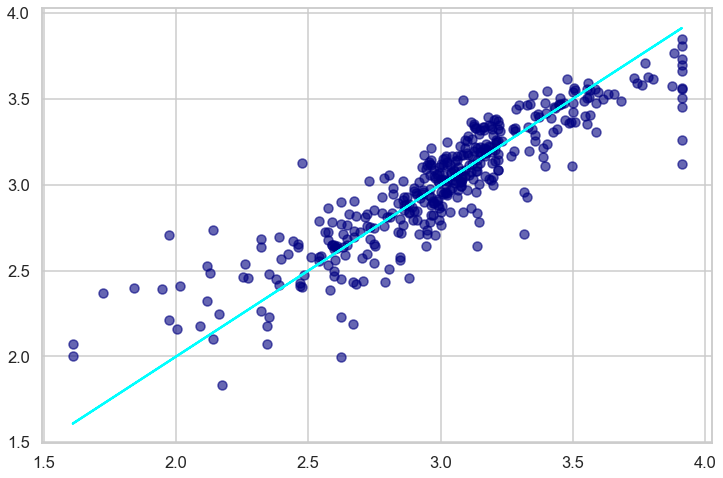

In [52]:
# Modified model: transformed (using log prices) and simplified (dropping two features)
prices= np.log(data['PRICE'])
features= data.drop(['PRICE', 'INDUS', 'AGE'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size= 0.2, random_state= 10)

#using statsmodel

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# Residuals

# residuals = y_train - results.fittedvalues
# residuals
results.resid

# Graph of actual vs predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter(y_train, results.fittedvalues, c= 'navy', alpha= 0.6)
plt.plot(y_train, y_train, c = 'cyan')
plt.show()

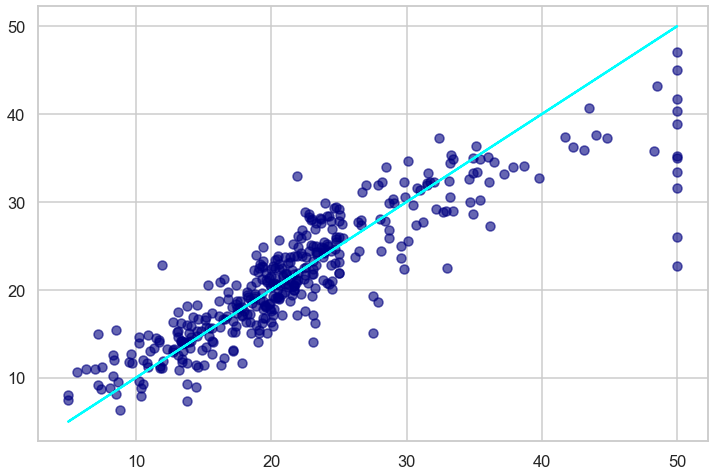

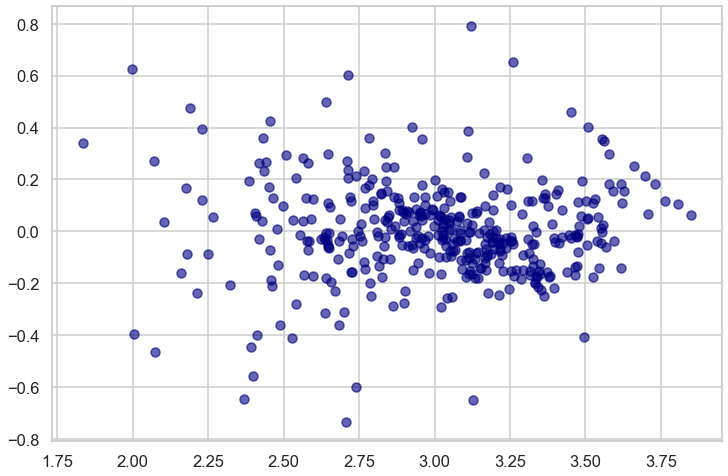

In [53]:
# Graph of actual (in 1000s) vs predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter(np.e**y_train, np.e**results.fittedvalues, c= 'navy', alpha= 0.6)
plt.plot(np.e**y_train, np.e**y_train, c = 'cyan')
plt.show()

# Graph of residuals vs predicted prices

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter( results.fittedvalues, results.resid, c= 'navy', alpha= 0.6)

plt.show()

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


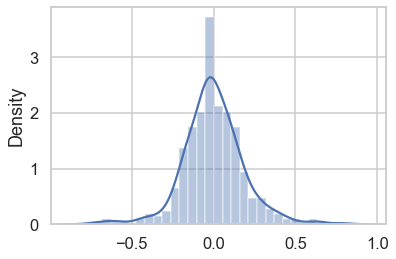

In [54]:
# Distribution of residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid)
plt.show()

## Mean Squared error

In [55]:
reduced_log_mse = results.mse_resid
reduced_log_rmse = np.sqrt(reduced_log_mse)
reduced_log_rsquared = results.rsquared
print(reduced_log_mse)
print(reduced_log_rsquared)
reduced_log_rmse

0.03487337082354597
0.7918657661852815


0.18674413196549436

In [56]:
print('1 s.d. in log prices is: ', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is: ', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('upper bound in log prices for 95% prediction is: ', upper_bound)
print('upper bound in normal prices for 95% prediction is: ', np.e**upper_bound*1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('lower bound in log prices for 95% prediction is: ', lower_bound)
print('lower bound in normal prices for 95% prediction is: ', np.e**lower_bound*1000)

1 s.d. in log prices is:  0.18674413196549436
2 s.d. in log prices is:  0.3734882639309887
upper bound in log prices for 95% prediction is:  3.774685645593144
upper bound in normal prices for 95% prediction is:  43583.8054007552
lower bound in log prices for 95% prediction is:  3.027709117731167
lower bound in normal prices for 95% prediction is:  20649.87193579029
